

# "Analysing factors affecting GDP"
> "Exploratory analysis to understand factors influencing GDP of a country"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Anna Blake
- categories: [data-science-project]
- image: images/gdp_of_countries/cover_photo_nominal_gdp_of_countries.png
- hide: false
- search_exclude: true

## Project motivation and objectives

This workbook presents Exploratory Data Analysis of the data sourced from Kaggle called 'Countries of the World'.

My aim is to explore the data, look at relationships between variables, perform correlation analysis, group the data into more meaningfull sections for further analysis using Regression Model and build a prediction model with a Decision tree or a Classification Model.

The focus will be on the GDP data and a few other variables that have the biggest impact/link to it. To make the analysis easier the Countries of the World data is ging to be joined with the Human Development Index data. This will help to divide the countries into developed and undeveloped.

## Data Collection

Data sourced from Kaggle:
    
https://www./kaggle/input/countries-of-the-world/countries of the world.csv

About this file:
Data compiled from US Government
1970-2017
Information on population, region, area size, infant mortality and more.
Date created: 2018-04-26
    
https://www.kaggle.com/fernandol/countries-of-the-world

https://worldpopulationreview.com/country-rankings/developed-countries 
Ranking based on Human Development Index

Sources:
United Nations Human Development Data Center
United Nations Human Development Index Composite Indices
CIA World Factbook

http://hdr.undp.org/en/indicators/137506#
Released in December 2020, the United Nations Human Development Report 2020 ranks each country in the world based on its HDI ranking.     
The 2020 Human Development Report by the United Nations Development Programme was released on 15 December 2020,
and calculates HDI values based on estimates for 2019. 
HDI is set on a scale from 0 to 1, and most developed countries have a score above .80. 

A developed country is a sovereign state with a mature economy and technologically advanced infrastructure compared to other nations. Several factors determine whether or not a country is developed, such as its political stability, gross domestic product (GDP), level of industrialization, social welfare programs, infrastructure, and the freedoms its citizens enjoy. Countries that are not quite yet developed are called developing countries.

## Import dependencies

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import datetime
from pylab import *
from scipy import *
from pylab import rcParams
import statsmodels.formula.api as smf
%matplotlib inline

In [ ]:
# Show the version of Pandas and Numpy
print(pd.__version__)
print(np.__version__)

## Data preperation 

Loading datasets from csv files

In [ ]:
df_world = pd.read_csv('data/countries of the world.csv')

In [163]:
df_hdi = pd.read_csv('data/csvData.csv')

Checking the number of rows and columns

In [ ]:
df_world.shape

Checking the information about the data: Column names, data type, 
if there are any columns with missing data

In [26]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n


Conclusion:

1. some columns have missing data values, 

2. data types have to be changed from object to float for numerical data columns: column 3 to 19


In [27]:
print(df_world.describe())

         Population  Area (sq. mi.)  GDP ($ per capita)
count  2.270000e+02    2.270000e+02          226.000000
mean   2.874028e+07    5.982270e+05         9689.823009
std    1.178913e+08    1.790282e+06        10049.138513
min    7.026000e+03    2.000000e+00          500.000000
25%    4.376240e+05    4.647500e+03         1900.000000
50%    4.786994e+06    8.660000e+04         5550.000000
75%    1.749777e+07    4.418110e+05        15700.000000
max    1.313974e+09    1.707520e+07        55100.000000


In [28]:
df_world.head()

Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                             163,07               700.0   
1         -4,93                              21,52              4500.0   
2         -0,39                                 31              6000.0   
3        -20,71                               9,27              8000.0   
4           6,6                               4,05             19000.0   

  Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0         36,0               3,2      12,13      0,22     87,65       1   
1         86,5              71,2      21,09      4,42     74,49       3   
2         70,0              78,1       3,22      0,25     96,53       1   
3         97,0             259,5         10        15        75       2   
4        100,0             497,2       2,22         0     97,78       3   

  Birthrate Deathrate Agriculture Industry Service  
0      46,6     20,34        0,38     0,24    0,38  
1     15,11      5,22       0,232    0,188   0,579  
2     17,14      4,61       0,101      0,6   0,298  
3     22,46      3,27         NaN      NaN     NaN  
4      8,71      6,25         NaN      NaN     NaN

Changing the data type from Object to String to Float:

In [164]:

df_world["Pop. Density (per sq. mi.)"] = df_world["Pop. Density (per sq. mi.)"].astype('str')
df_world["Pop. Density (per sq. mi.)"] = df_world["Pop. Density (per sq. mi.)"].str.replace(',', '.')
df_world["Pop. Density (per sq. mi.)"] = df_world["Pop. Density (per sq. mi.)"].astype("float")

df_world["Coastline (coast/area ratio)"] = df_world["Coastline (coast/area ratio)"].astype('str')
df_world["Coastline (coast/area ratio)"] = df_world["Coastline (coast/area ratio)"].str.replace(',', '.')
df_world["Coastline (coast/area ratio)"] = df_world["Coastline (coast/area ratio)"].astype("float")

df_world["Net migration"] = df_world["Net migration"].astype('str')
df_world["Net migration"] = df_world["Net migration"].str.replace(',', '.')
df_world["Net migration"] = df_world["Net migration"].astype("float")  

df_world["Infant mortality (per 1000 births)"] = df_world["Infant mortality (per 1000 births)"].astype('str')
df_world["Infant mortality (per 1000 births)"] = df_world["Infant mortality (per 1000 births)"].str.replace(',', '.')
df_world["Infant mortality (per 1000 births)"] = df_world["Infant mortality (per 1000 births)"].astype("float")  

df_world["Literacy (%)"] = df_world["Literacy (%)"].astype('str')
df_world["Literacy (%)"] = df_world["Literacy (%)"].str.replace(',', '.')
df_world["Literacy (%)"] = df_world["Literacy (%)"].astype("float")  

df_world["Phones (per 1000)"] = df_world["Phones (per 1000)"].astype('str')
df_world["Phones (per 1000)"] = df_world["Phones (per 1000)"].str.replace(',', '.')
df_world["Phones (per 1000)"] = df_world["Phones (per 1000)"].astype("float")

df_world["Arable (%)"] = df_world["Arable (%)"].astype('str')
df_world["Arable (%)"] = df_world["Arable (%)"].str.replace(',', '.')
df_world["Arable (%)"] = df_world["Arable (%)"].astype("float") 

df_world["Crops (%)"] = df_world["Crops (%)"].astype('str')
df_world["Crops (%)"] = df_world["Crops (%)"].str.replace(',', '.')
df_world["Crops (%)"] = df_world["Crops (%)"].astype("float")  

df_world["Other (%)"] = df_world["Other (%)"].astype('str')
df_world["Other (%)"] = df_world["Other (%)"].str.replace(',', '.')
df_world["Other (%)"] = df_world["Other (%)"].astype("float")  

df_world["Climate"] = df_world["Climate"].astype('str')
df_world["Climate"] = df_world["Climate"].str.replace(',', '.')
df_world["Climate"] = df_world["Climate"].astype("float")  

df_world["Birthrate"] = df_world["Birthrate"].astype('str')
df_world["Birthrate"] = df_world["Birthrate"].str.replace(',', '.')
df_world["Birthrate"] = df_world["Birthrate"].astype("float")  

df_world["Deathrate"] = df_world["Deathrate"].astype('str')
df_world["Deathrate"] = df_world["Deathrate"].str.replace(',', '.')
df_world["Deathrate"] = df_world["Deathrate"].astype("float64")  

df_world["Agriculture"] = df_world["Agriculture"].astype('str')
df_world["Agriculture"] = df_world["Agriculture"].str.replace(',', '.')
df_world["Agriculture"] = df_world["Agriculture"].astype("float64") 

df_world["Industry"] = df_world["Industry"].astype('str')
df_world["Industry"] = df_world["Industry"].str.replace(',', '.')
df_world["Industry"] = df_world["Industry"].astype("float64") 

df_world["Service"] = df_world["Service"].astype('str')
df_world["Service"] = df_world["Service"].str.replace(',', '.')
df_world["Service"] = df_world["Service"].astype("float64")  


Checking if the data type is correct after changing the data type from Object to String to Float

In [165]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [166]:
# Checking if the data looks correct after the above
df_world.head() 

Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  \
0          36.0                3.2       12.13       0.22      87.65      1.0   
1          86.5               71.2       21.09       4.42      74.49      3.0   
2          70.0               78.1        3.22       0.25      96.53      1.0   
3          97.0              259.5       10.00      15.00      75.00      2.0   
4         100.0              497.2        2.22       0.00      97.78      3.0   

   Birthrate  Deathrate  Agriculture  Industry  Service  
0      46.60      20.34        0.380     0.240    0.380  
1      15.11       5.22        0.232     0.188    0.579  
2      17.14       4.61        0.101     0.600    0.298  
3      22.46       3.27          NaN       NaN      NaN  
4       8.71       6.25          NaN       NaN      NaN

> Some columns have missing data values: NaN. We have to look at the data to decide what effect the missing values have on the data and how they can be treated.
> Since they are numerical variables we can replace NaN empty cells with zeros. 

> Another option would be to fill in the missing values with the mean of each column.
#df_world.fillna(df_world.mean(), inplace=True)

>or calculate the average based on the values for the region in each column.

Replace missing values with zeros.

In [167]:
df_world = df_world.fillna(0)
df_world.replace(np.nan,0)

Country                               Region  Population  \
0       Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1           Albania   EASTERN EUROPE                          3581655   
2           Algeria   NORTHERN AFRICA                        32930091   
3    American Samoa   OCEANIA                                   57794   
4           Andorra   WESTERN EUROPE                            71201   
..               ...                                  ...         ...   
222       West Bank   NEAR EAST                               2460492   
223  Western Sahara   NORTHERN AFRICA                          273008   
224           Yemen   NEAR EAST                              21456188   
225          Zambia   SUB-SAHARAN AFRICA                     11502010   
226        Zimbabwe   SUB-SAHARAN AFRICA                     12236805   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0            647500                        48.0                          0.00   
1             28748                       124.6                          1.26   
2           2381740                        13.8                          0.04   
3               199                       290.4                         58.29   
4               468                       152.1                          0.00   
..              ...                         ...                           ...   
222            5860                       419.9                          0.00   
223          266000                         1.0                          0.42   
224          527970                        40.6                          0.36   
225          752614                        15.3                          0.00   
226          390580                        31.3                          0.00   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0            23.06                              163.07               700.0   
1            -4.93                               21.52              4500.0   
2            -0.39                               31.00              6000.0   
3           -20.71                                9.27              8000.0   
4             6.60                                4.05             19000.0   
..             ...                                 ...                 ...   
222           2.98                               19.62               800.0   
223           0.00                                0.00                 0.0   
224           0.00                               61.50               800.0   
225           0.00                               88.29               800.0   
226           0.00                               67.69              1900.0   

     Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  \
0            36.0                3.2       12.13       0.22      87.65   
1            86.5               71.2       21.09       4.42      74.49   
2            70.0               78.1        3.22       0.25      96.53   
3            97.0              259.5       10.00      15.00      75.00   
4           100.0              497.2        2.22       0.00      97.78   
..            ...                ...         ...        ...        ...   
222           0.0              145.2       16.90      18.97      64.13   
223           0.0                0.0        0.02       0.00      99.98   
224          50.2               37.2        2.78       0.24      96.98   
225          80.6                8.2        7.08       0.03      92.90   
226          90.7               26.8        8.32       0.34      91.34   

     Climate  Birthrate  Deathrate  Agriculture  Industry  Service  
0        1.0      46.60      20.34        0.380     0.240    0.380  
1        3.0      15.11       5.22        0.232     0.188    0.579  
2        1.0      17.14       4.61        0.101     0.600    0.298  
3        2.0      22.46       3.27        0.000     0.000    

Confirm that there is no NaN cells

In [168]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

#### Descriptive statistics of df_world:

In [70]:
df_world.describe() # We can get more information after changing data type to numerical

Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
count  2.270000e+02    2.270000e+02                  227.000000   
mean   2.874028e+07    5.982270e+05                  379.047137   
std    1.178913e+08    1.790282e+06                 1660.185825   
min    7.026000e+03    2.000000e+00                    0.000000   
25%    4.376240e+05    4.647500e+03                   29.150000   
50%    4.786994e+06    8.660000e+04                   78.800000   
75%    1.749777e+07    4.418110e+05                  190.150000   
max    1.313974e+09    1.707520e+07                16271.500000   

       Coastline (coast/area ratio)  Net migration  \
count                    227.000000     227.000000   
mean                      21.165330       0.037621   
std                       72.286863       4.856712   
min                        0.000000     -20.990000   
25%                        0.100000      -0.905000   
50%                        0.730000       0.000000   
75%                       10.345000       0.980000   
max                      870.660000      23.060000   

       Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
count                          227.000000          227.000000    227.000000   
mean                            35.037709         9647.136564     76.269604   
std                             35.388330        10047.485847     29.346066   
min                              0.000000            0.000000      0.000000   
25%                              7.825000         1900.000000     62.950000   
50%                             20.910000         5500.000000     90.300000   
75%                             55.335000        15700.000000     97.800000   
max                            191.190000        55100.000000    100.000000   

       Phones (per 1000)  Arable (%)   Crops (%)   Other (%)     Climate  \
count         227.000000  227.000000  227.000000  227.000000  227.000000   
mean          231.901762   13.675551    4.524009   80.919031    1.931718   
std           228.099042   13.046722    8.335358   17.795561    0.918569   
min             0.000000    0.000000    0.000000    0.000000    0.000000   
25%            33.050000    3.095000    0.190000   70.875000    1.500000   
50%           164.100000   10.380000    1.010000   85.380000    2.000000   
75%           382.900000   20.000000    4.435000   95.230000    2.250000   
max          1035.600000   62.110000   50.680000  100.000000    4.000000   

        Birthrate   Deathrate  Agriculture    Industry     Service  
count  227.000000  227.000000   227.000000  227.000000  227.000000  
mean    21.822467    9.078502     0.140877    0.262784    0.527930  
std     11.387139    5.093580     0.146730    0.151741    0.213272  
min      0.000000    0.000000     0.000000    0.000000    0.000000  
25%     12.350000    5.755000     0.030500    0.170000    0.404500  
50%     18.710000    7.820000     0.090000    0.259000    0.559000  
75%     29.770000   10.580000     0.211000    0.335000    0.671500  
max     50.730000   29.740000     0.769000    0.906000    0.954000

```
Data Types:

 1   Country                            Categorical variable
 2   Region                             Categorical variable 
 2   Population                         Numerical variable, Ratio scale
 3   Area (sq. mi.)                     Numerical variable, Ratio scale
 4   Pop. Density (per sq. mi.)         Numerical variable  Ratio scale
 5   Coastline (coast/area ratio)       Numerical variable, Ratio scale
 6   Net migration                      Numerical variable, Ratio scale
 7   Infant mortality (per 1000 births) Numerical variable, Ratio scale
 8   GDP ($ per capita)                 Numerical variable, Ratio scale
 9   Literacy (%)                       Numerical variable, Ratio scale
 10  Phones (per 1000)                  Numerical variable, Ratio scale
 11  Arable (%)                         Numerical variable, Ratio scale
 12  Crops (%)                          Numerical variable, Ratio scale
 13  Other (%)                          Numerical variable, Ratio scale
 14  Climate                            Numerical variable, Ordinal scale  
 15  Birthrate                          Numerical variable, Ratio scale
 16  Deathrate                          Numerical variable, Ratio scale
 17  Agriculture                        Numerical variable, Ratio scale
 18  Industry                           Numerical variable, Ratio scale
 19  Service                            Numerical variable, Ratio scale

```

Checking the information about the data: Column names, data type, if there are any columns with missing data
for the second dataset.

In [170]:
df_hdi.info() # Info on Human Develpoment Index file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                190 non-null    object 
 1   humanDevelopmentIndex  190 non-null    float64
 2   pop2021                190 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.6+ KB


Rename column name from 'country' to 'Country' adn drop 'Pop2021' column

In [212]:
# Rename column name from 'country' to 'Country'
df_hdi.rename(columns={'country' : 'Country'}, inplace=True)

# Drop 'Pop2021' column
df_hdi.drop('pop2021', inplace=True, axis=1)

In [213]:
df_hdi.sort_values('Country', ascending=True)

Country  humanDevelopmentIndex
167  Afghanistan                  0.498
67       Albania                  0.785
83       Algeria                  0.754
34       Andorra                  0.858
145       Angola                  0.581
..           ...                    ...
77     Venezuela                  0.761
114      Vietnam                  0.694
176        Yemen                  0.452
143       Zambia                  0.588
154     Zimbabwe                  0.535

[190 rows x 2 columns]

In [215]:
df_hdi.head()

Country  humanDevelopmentIndex
0       Norway                  0.953
1  Switzerland                  0.944
2    Australia                  0.939
3      Ireland                  0.938
4      Germany                  0.936

In [216]:
# Join two dataframes with an outer join to keep all rows.
# df_world1 = pd.merge(df_hdi, df_world, how='outer', on='Country')
right_joined = pd.merge(df_hdi, df_world, how='right', on='Country')

In [218]:
df_world1.shape

(417, 22)

In [236]:
df_world1

Country  humanDevelopmentIndex    pop2021  \
0             Norway                  0.953   5465.630   
1        Switzerland                  0.944   8715.494   
2          Australia                  0.939  25788.215   
3            Ireland                  0.938   4982.907   
4            Germany                  0.936  83900.473   
..               ...                    ...        ...   
412       West Bank                     NaN        NaN   
413  Western Sahara                     NaN        NaN   
414           Yemen                     NaN        NaN   
415          Zambia                     NaN        NaN   
416        Zimbabwe                     NaN        NaN   

                                  Region  Population  Area (sq. mi.)  \
0                                    NaN         NaN             NaN   
1                                    NaN         NaN             NaN   
2                                    NaN         NaN             NaN   
3                                    NaN         NaN             NaN   
4                                    NaN         NaN             NaN   
..                                   ...         ...             ...   
412  NEAR EAST                             2460492.0          5860.0   
413  NORTHERN AFRICA                        273008.0        266000.0   
414  NEAR EAST                            21456188.0        527970.0   
415  SUB-SAHARAN AFRICA                   11502010.0        752614.0   
416  SUB-SAHARAN AFRICA                   12236805.0        390580.0   

     Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
0                           NaN                           NaN            NaN   
1                           NaN                           NaN            NaN   
2                           NaN                           NaN            NaN   
3                           NaN                           NaN            NaN   
4                           NaN                           NaN            NaN   
..                          ...                           ...            ...   
412                       419.9                          0.00           2.98   
413                         1.0                          0.42           0.00   
414                        40.6                          0.36           0.00   
415                        15.3                          0.00           0.00   
416                        31.3                          0.00           0.00   

     Infant mortality (per 1000 births)  ...  Phones (per 1000)  Arable (%)  \
0                                   NaN  ...                NaN         NaN   
1                                   NaN  ...                NaN         NaN   
2                                   NaN  ...                NaN         NaN   
3                                   NaN  ...                NaN         NaN   
4                                   NaN  ...                NaN         NaN   
..                                  ...  ...                ...         ...   
412                               19.62  ...              145.2       16.90   
413                                0.00  ...                0.0        0.02   
414                               61.50  ...               37.2        2.78   
415                               88.29  ...                8.2        7.08   
416                               67.69  ...               26.8        8.32   

     Crops (%)  Other (%)  Climate  Birthrate  Deathrate  Agriculture  \
0          NaN        NaN      NaN        NaN        NaN          NaN   
1          NaN        NaN      NaN        NaN        NaN          NaN   
2          NaN        NaN      NaN        NaN        NaN          NaN   
3          NaN        NaN      NaN        NaN        NaN          NaN   
4          NaN        NaN      NaN        NaN        NaN          NaN   
..         ...        ...      ...        ...        ...          ...   
412      18.97      64.13     

## Exploratory Analysis

7.1 List of the top 20 countries with the highest population
    
    Bar graph of top 30 countries with the highest populations

7.2 What proportion of the world population lives in each region of the world?

7.3 List of the top 20 countires with the largest area in square miles including population density per sq mile
    
    Side bar graph of the top 30 countries with the largest area in sq miles

7.4 Side bar graph of number of countries in each region of the world

7.5 GDP Analysis:

    Graph of countries with the highest total GDP
    Top Countries with lowest GDP per capita
    Top Countries with highest GDP per capita
    Box plot of GDP V Region
    Which Country in the world has the highest GDP?
    Graph of the share of Total GDP of Top 25 countries
    
    Further analysis of the relation between GDP and some of the factors with the strongest 
    correlation (positive and negative) with GDP.
    
    Scatterplot showing the effect of literacy on GDP of countries
    Analysing the proportion of Agriculture, Industry and Service sectors in the countries 
    with the largest geographical area
    Scatterplot showing the relationship of birthrate and population
    Relationship between birthrate and infant mortality
    Plot showing Infant Mortality in relation to GDP 
    Plot showing Phone ownership in relation to GDP 
    Birthrate and Deathrate of Top 100 Countries in realtion to GDP
    
    Split the data based on GDP column into Developed, Developing and Undeveloped portions



7.1 List of the top 20 countries with the highest population

In [71]:
# sort the dataset by Population, descnding values
df_world.sort_values('Population', ascending=False, inplace=True)  

df_world.iloc[0:20,[0,1,2]]  # Select first largest 20 and show selected columns

Country                               Region  Population
42              China         ASIA (EX. NEAR EAST)           1313973713
94              India         ASIA (EX. NEAR EAST)           1095351995
214     United States   NORTHERN AMERICA                      298444215
95          Indonesia         ASIA (EX. NEAR EAST)            245452739
27             Brazil               LATIN AMER. & CARIB       188078227
156          Pakistan         ASIA (EX. NEAR EAST)            165803560
16         Bangladesh         ASIA (EX. NEAR EAST)            147365352
169            Russia                  C.W. OF IND. STATES    142893540
152           Nigeria   SUB-SAHARAN AFRICA                    131859731
103             Japan         ASIA (EX. NEAR EAST)            127463611
135            Mexico               LATIN AMER. & CARIB       107449525
162       Philippines         ASIA (EX. NEAR EAST)             89468677
219           Vietnam         ASIA (EX. NEAR EAST)             84402966
76            Germany   WESTERN EUROPE                         82422299
60              Egypt   NORTHERN AFRICA                        78887007
65           Ethiopia   SUB-SAHARAN AFRICA                     74777981
206            Turkey   NEAR EAST                              70413958
96               Iran         ASIA (EX. NEAR EAST)             68688433
201          Thailand         ASIA (EX. NEAR EAST)             64631595
45   Congo, Dem. Rep.   SUB-SAHARAN AFRICA                     62660551

Bar graph of top 30 countries with the highest populations

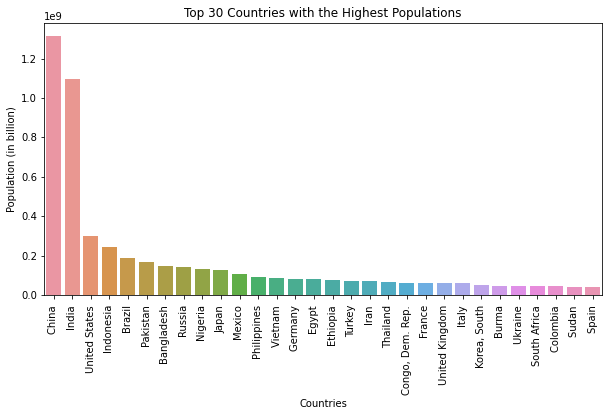

In [72]:
mostPop30Data = df_world.sort_values("Population", ascending = False).head(30)

plt.figure(figsize = (10, 5))
sns.barplot(x = mostPop30Data["Country"], y = mostPop30Data["Population"])
plt.xticks(rotation = 90)
plt.title("Top 30 Countries with the Highest Populations")
plt.xlabel("Countries")
plt.ylabel("Population (in billion)")
plt.show()

7.2 What proportion of the world population lives in each region of the world?


In [73]:
# SHOW THE PERCENTAGE OF THE REGION'S POPULATION AS A PROPORTION OF THE TOTAL WORLD POPULATION

# Creating new data frame with population grouped by Region   
prop = pd.DataFrame(df_world.groupby('Region')['Population'].sum()) 

# Renaming column name to sum of population in each region
prop.columns = ['Population'] 
sum = prop.sum() # Total population

# Percentage Population / Region
prop['Proportion'] = prop.apply(lambda Population: 100*Population/float(Population.sum()))
prop
#prop.head()


Population  Proportion
Region                                                     
ASIA (EX. NEAR EAST)                 3687982236   56.529078
BALTICS                                 7184974    0.110131
C.W. OF IND. STATES                   280081548    4.293066
EASTERN EUROPE                        119914717    1.838043
LATIN AMER. & CARIB                   561824599    8.611600
NEAR EAST                             195068377    2.989991
NORTHERN AFRICA                       161407133    2.474035
NORTHERN AMERICA                      331672307    5.083845
OCEANIA                                33131662    0.507839
SUB-SAHARAN AFRICA                    749437000   11.487307
WESTERN EUROPE                        396339998    6.075066

The regions with the highest proportion of the world's population are:


Asia(ex. Near East)          56.52% 

Sub-Saharan Africa           11.49%

Latin America and Carribean  8.61%


7.3 List of the top 20 countires with the largest area in square miles including population density per sq mile

In [74]:
## sort the dataset by Area, descending values
df_world.sort_values('Area (sq. mi.)', ascending=False, inplace=True)  

df_world.iloc[0:20,[0,1,3,4]]  # Select first largest 20 and show selected columns


Country                               Region  Area (sq. mi.)  \
169            Russia                  C.W. OF IND. STATES         17075200   
36             Canada   NORTHERN AMERICA                            9984670   
214     United States   NORTHERN AMERICA                            9631420   
42              China         ASIA (EX. NEAR EAST)                  9596960   
27             Brazil               LATIN AMER. & CARIB             8511965   
11          Australia   OCEANIA                                     7686850   
94              India         ASIA (EX. NEAR EAST)                  3287590   
8           Argentina               LATIN AMER. & CARIB             2766890   
106        Kazakhstan                  C.W. OF IND. STATES          2717300   
192             Sudan   SUB-SAHARAN AFRICA                          2505810   
2             Algeria   NORTHERN AFRICA                             2381740   
45   Congo, Dem. Rep.   SUB-SAHARAN AFRICA                          2345410   
80          Greenland   NORTHERN AMERICA                            2166086   
135            Mexico               LATIN AMER. & CARIB             1972550   
179      Saudi Arabia   NEAR EAST                                   1960582   
95          Indonesia         ASIA (EX. NEAR EAST)                  1919440   
118             Libya   NORTHERN AFRICA                             1759540   
96               Iran         ASIA (EX. NEAR EAST)                  1648000   
139          Mongolia         ASIA (EX. NEAR EAST)                  1564116   
161              Peru               LATIN AMER. & CARIB             1285220   

     Pop. Density (per sq. mi.)  
169                         8.4  
36                          3.3  
214                        31.0  
42                        136.9  
27                         22.1  
11                          2.6  
94                        333.2  
8                          14.4  
106                         5.6  
192                        16.5  
2                          13.8  
45                         26.7  
80                          0.0  
135                        54.5  
179                        13.8  
95                        127.9  
118                         3.4  
96                         41.7  
139                         1.8  
161                        22.0

Side bar graph of the top 30 countries with the largest area in sq miles

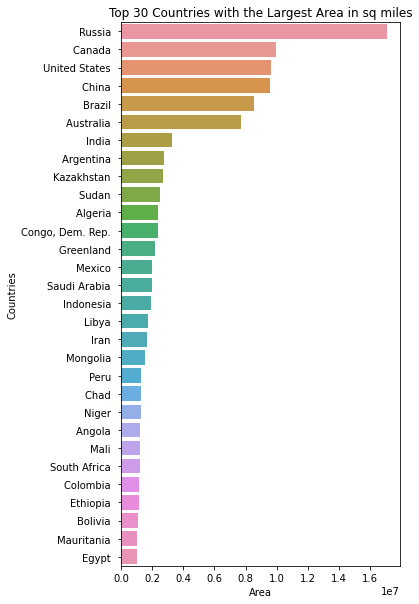

In [75]:
largeArea30Data = df_world.sort_values("Area (sq. mi.)", ascending = False).head(30)

plt.figure(figsize = (5, 10))
sns.barplot(x = largeArea30Data["Area (sq. mi.)"], y = largeArea30Data["Country"])
plt.title("Top 30 Countries with the Largest Area in sq miles")
plt.xlabel("Area")
plt.ylabel("Countries")
plt.show()
largeArea30Data = df_world.sort_values("Area (sq. mi.)", ascending = False).head(30)


7.4 Side bar graph of number of countries in each region of the world

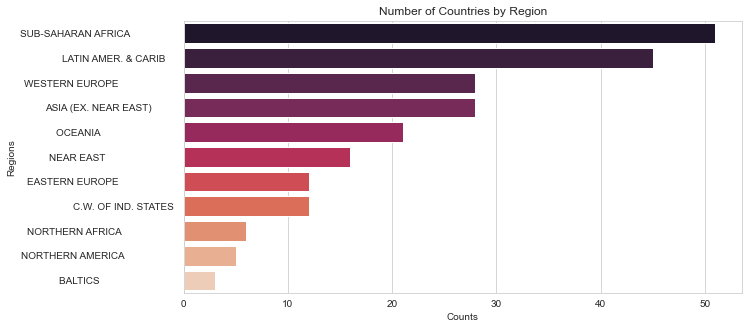

In [226]:
#It looks like the Sub-Saharan and the Latin America/Caribbean region contains the most nations.

region = df_world['Region'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(y=region.index, x=region.values, palette='rocket')
plt.title('Number of Countries by Region')
plt.xlabel('Counts')
plt.ylabel('Regions')
plt.show()


7.5 GDP Analysis

Countries with the highest total GDP

<AxesSubplot:title={'center':'Highest Total GDP per Country and population'}, xlabel='Country', ylabel='Total_GDP'>

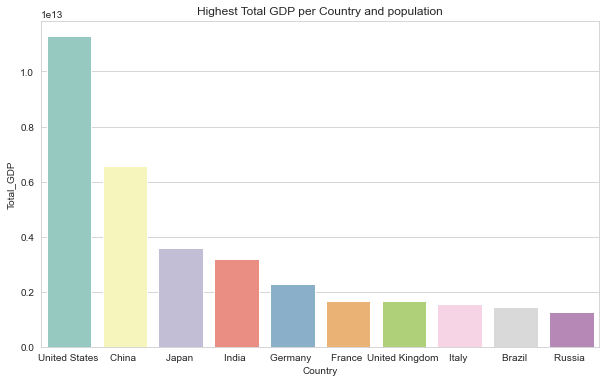

In [232]:
df_world['Total_GDP'] = df_world['GDP ($ per capita)'] * df_world['Population']
plt.figure(figsize=(10,6))
plt.title('Highest Total GDP per Country and population')

sns.barplot(x='Country',y='Total_GDP',data=df_world.sort_values('Total_GDP',ascending=False).head(10),palette='Set3')


Top Countries with lowest GDP per capita

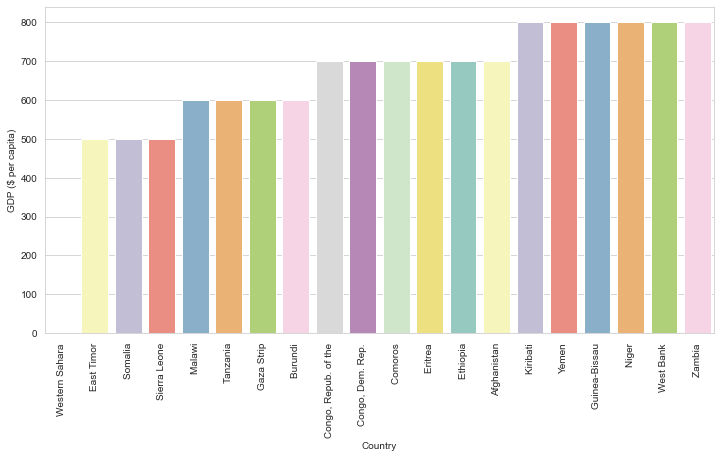

In [230]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Country',y='GDP ($ per capita)',data=df_world.sort_values('GDP ($ per capita)',ascending=True).head(20), palette='Set3')
plt.xticks(rotation=90)
plt.show()


Top Countries with highest GDP per capita

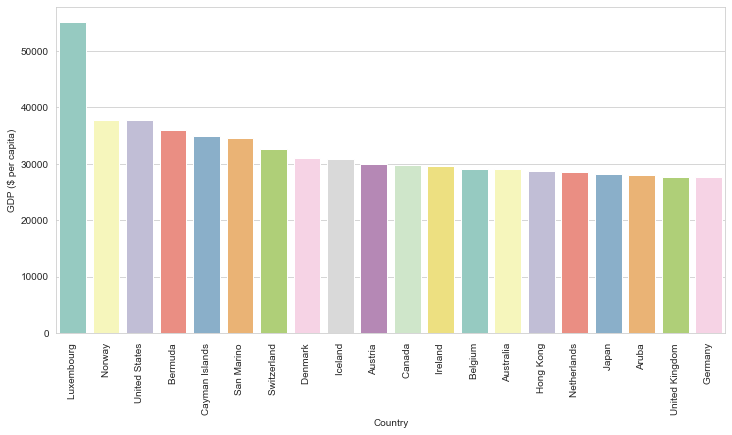

In [231]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Country',y='GDP ($ per capita)',data=df_world.sort_values('GDP ($ per capita)',ascending=False).head(20), palette='Set3')
plt.xticks(rotation=90)
plt.show()

Box plot of GDP V Region

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
WESTERN EUROPE                         28
ASIA (EX. NEAR EAST)                   28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64


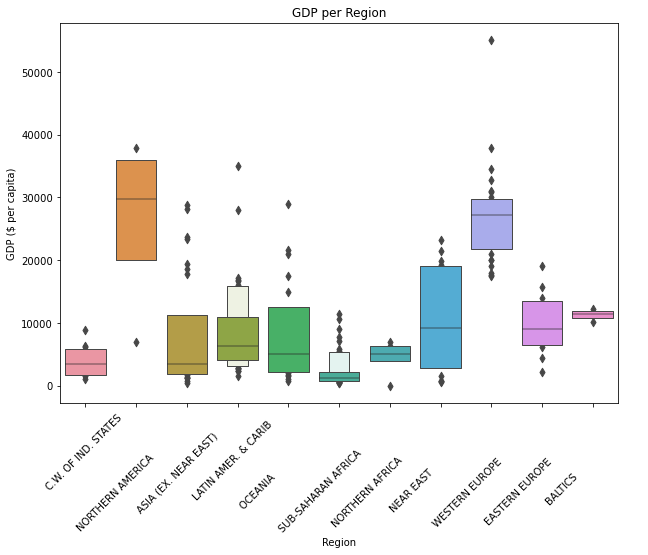

In [81]:
print(df_world["Region"].value_counts())

plt.figure(figsize=(10,7))
#sns.boxenplot(data=data, x='Region', y='GDP ($ per capita)')
sns.boxenplot(data=df_world, x='Region', y='GDP ($ per capita)')
plt.title('GDP per Region')
plt.xticks(rotation=45)
plt.show()

> As expected, Northern America and Western Europe have the highest GDP, but there are some outliers in the Latin America & Caribbean plus Asia regions also.

Which country has the highest GDP in the world?

In [256]:
df_world.nlargest(1, 'GDP ($ per capita)')


Country                               Region  Population  \
121  Luxembourg   WESTERN EUROPE                           474413   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
121            2586                       183.5                           0.0   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
121           8.97                                4.81             55100.0   

     Literacy (%)  ...  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
121         100.0  ...       23.28        0.4      76.32      0.0      11.94   

     Deathrate  Agriculture  Industry  Service     Total_GDP  
121       8.41         0.01      0.13     0.86  2.614016e+10  

[1 rows x 21 columns]

> It looks like Luxembourg has the highest GDP in the world of $55,100.

Share of Total GDP of Top 25 countries

<Figure size 1008x720 with 0 Axes>

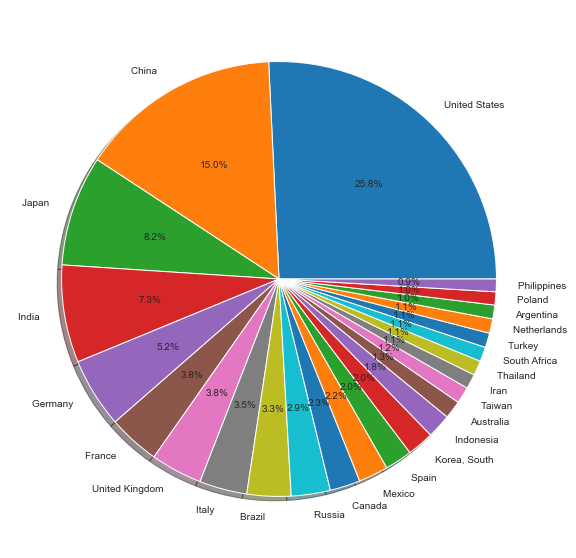

In [260]:


df_world['Total_GDP'] = df_world['GDP ($ per capita)'] * df_world['Population']
plt.figure(figsize=(14,10))

plt.subplots(figsize=(14,10))
gdp=df_world.sort_values('Total_GDP',ascending=False).head(25)
plt.pie(gdp['Total_GDP'],labels=gdp['Country'],autopct='%1.1f%%',shadow=True);

Further analysis of the relation between GDP and some of the factors with the strongest 
correlation (positive and negative) with GDP. 

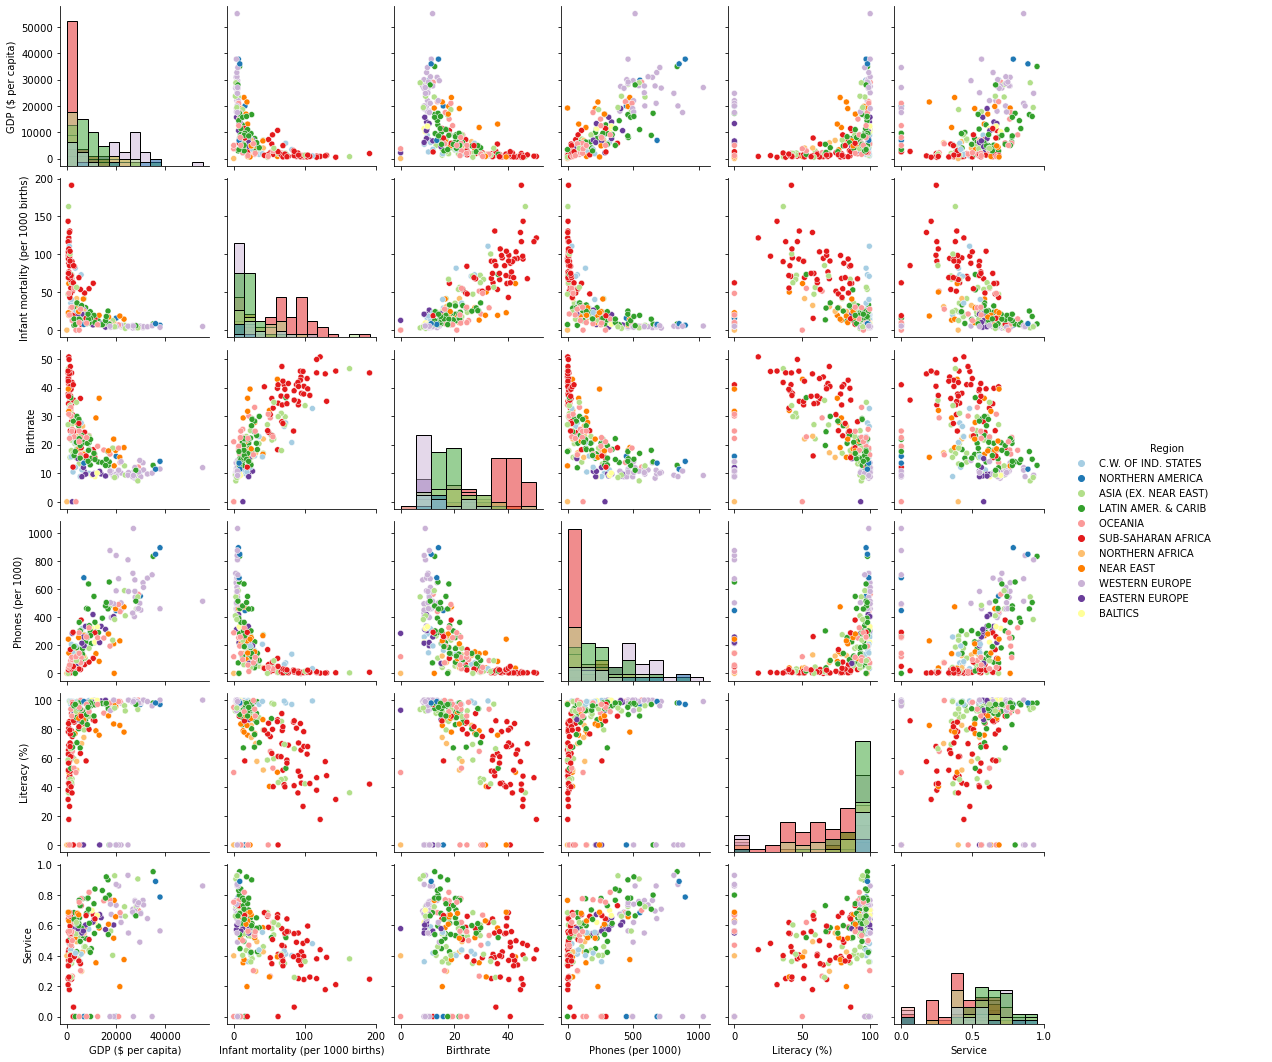

In [84]:
x = df_world.loc[:,["Region","GDP ($ per capita)","Infant mortality (per 1000 births)","Birthrate","Phones (per 1000)","Literacy (%)","Service"]]
sns.pairplot(x, hue="Region",palette='Paired', diag_kind='hist')
plt.show()


Scatterplot showing the effect of literacy on GDP of countries

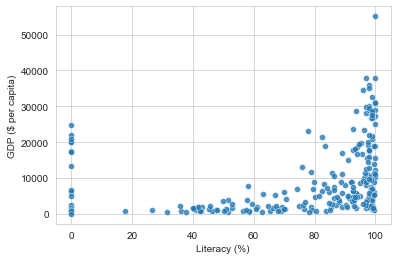

In [222]:
sns.set_style('whitegrid')

#plt.figure(figsize = (15,10))
sns.scatterplot(data=df_world, x='Literacy (%)', y='GDP ($ per capita)', alpha=0.8,)  
plt.show()


> There is a clear link between increased Literacy and increase in GDP per capita. Richer, more developed countries can afford to spend more on educating their population. This in turn drives develpment and GDP as educated workforce contrinutes more to the economy and helps it grow larger.

Analysing the proportion of Agriculture, Industry and Service sectors in the countries with the largest geographical area

<Figure size 1152x864 with 0 Axes>

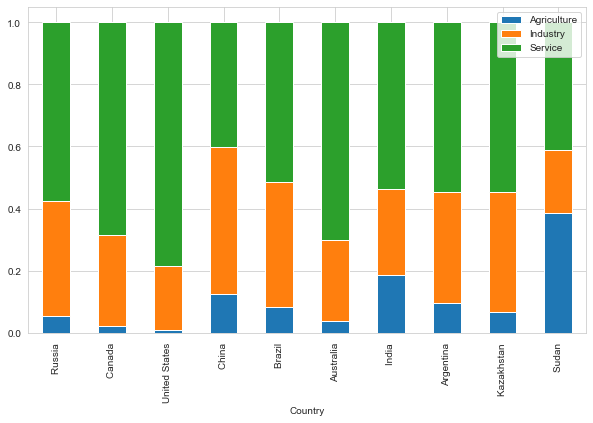

In [86]:
plt.figure(figsize=(16,12))
gdp=df_world[['Country','Agriculture', 'Industry', 'Service']].set_index('Country').head(10).plot.bar(stacked=True,figsize=(10,6))

> The countries with the largest area seem to have economies with quite a small part of them
dedicated to the agriculture (with the exception of Sudan). Services and to a smaller extent Industry 
are the have main drivers of economic growth.


Scatterplot showing the relationship of birthrate and population

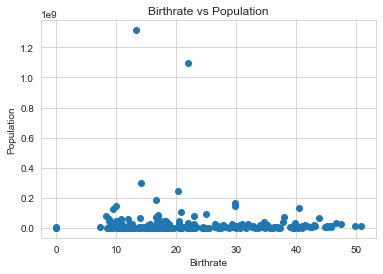

In [87]:

plt.figure()
plt.scatter(df_world['Birthrate'], df_world['Population'])
plt.xlabel('Birthrate')
plt.ylabel('Population')
plt.title('Birthrate vs Population')
plt.show()

In [ ]:
Relationship between birthrate and infant mortality

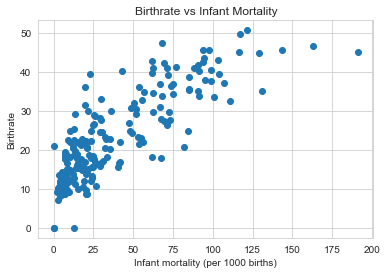

In [88]:

plt.figure()
plt.scatter(df_world['Infant mortality (per 1000 births)'], df_world['Birthrate'])
plt.xlabel('Infant mortality (per 1000 births)')
plt.ylabel('Birthrate')
plt.title('Birthrate vs Infant Mortality')
plt.show()


> As the birthrate increases, infant mortality also increases. This could be due to just the number of the population being higher 
> affecting the trend. Other factors could be: the developing countires with the biggest population have the highest birthrates but possibly also the increasing infant mortality due to limited availability of healthcare and medical infrastructure, 
> inability to afford the specialist medical care, even distance and ease of transport to the nearest hospital/medical centre.
> As we know, the developed countries in general have declining birth rates and easier access and resources for medical care.


In [ ]:
Plot showing infant mortality in relation to GDP

<Figure size 1080x720 with 0 Axes>

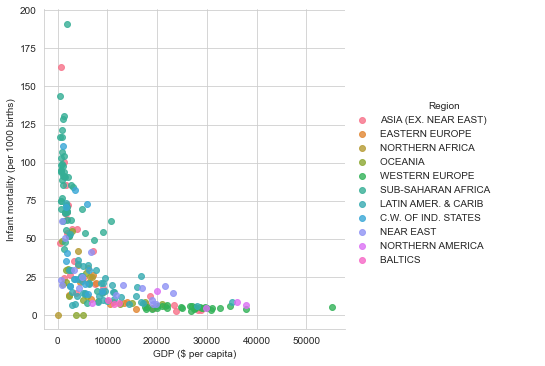

In [221]:

plt.figure(figsize=(15,10))
sns.lmplot(x='GDP ($ per capita)', y='Infant mortality (per 1000 births)', data=df_world, fit_reg=False, hue = 'Region')
plt.show()

> It is clear that as GDP rises the infant mortality reduces. This result ties in with the graph above as more resources and better healthcare help to reduce it.

Plot showing Phone ownership in relation to GDP 

<Figure size 1080x720 with 0 Axes>

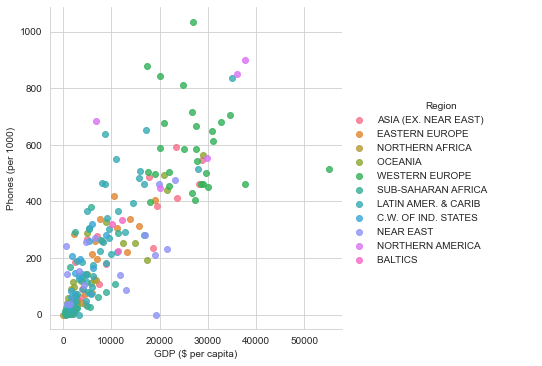

In [262]:
 
plt.figure(figsize=(15,10))
sns.lmplot(x='GDP ($ per capita)', y='Phones (per 1000)', data=df_world, fit_reg=False, hue = 'Region')
plt.show()

> In this case we can see that as the phone ownership goeas up it has an effect on GDP. It probably works the other way
as well, as the country becomes more prosperous people can afford tro buy more phones.
People can generate more economic activity when they have access to communication devices, internet, more information 
available to make decisions and generate ideas.

Birthrate and Deathrate of Top 100 Countries in realtion to GDP

Text(0.5, 1.0, 'Birthrate and Deathrate of Top 100 Countries')

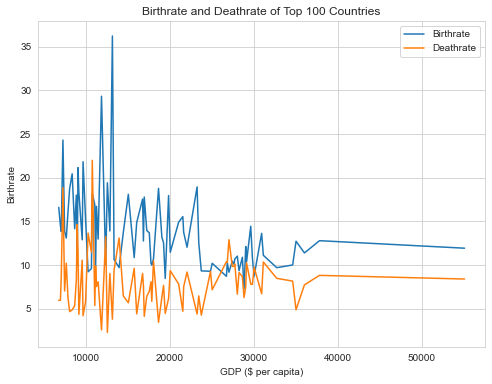

In [263]:

#plt.figure(figsize=(16,12))
sns.lineplot(data=df_world.sort_values('GDP ($ per capita)',ascending=False).head(100),x='GDP ($ per capita)',y='Birthrate',ci=None,label='Birthrate')
sns.lineplot(data=df_world.sort_values('GDP ($ per capita)',ascending=False).head(100),x='GDP ($ per capita)',y='Deathrate',ci=None,label='Deathrate')
plt.title('Birthrate and Deathrate of Top 100 Countries')


> Definition of Developed Country from Wikipedia:
A developed country (or industrialized country, high-income country, more economically developed country (MEDC), 
advanced country[3][4]) is a sovereign state that has a high quality of life, developed economy and advanced technological 
infrastructure relative to other less industrialized nations. Most commonly, the criteria for evaluating the degree 
of economic development are gross domestic product (GDP), gross national product (GNP), the per capita income,
level of industrialization, amount of widespread infrastructure and general standard of living.[5] Which criteria 
are to be used and which countries can be classified as being developed are subjects of debate. A point of reference
of US$20,000 in 2021 USD nominal GDP per capita for the IMF is a good point of departure, it is a similar level of development
to the United States in 1960.[6]


> Developed countries have generally more advanced post-industrial economies, meaning the service sector provides more wealth
than the industrial sector. They are contrasted with developing countries, which are in the process of industrialisation
or are pre-industrial and almost entirely agrarian, some of which might fall into the category of Least Developed Countries.
As of 2015, advanced economies comprise 60.8% of global GDP based on nominal values and 42.9% of global GDP based on
purchasing-power parity (PPP) according to the International Monetary Fund.[7]


> Human Development Index (HDI)
The UN HDI is a statistical measure that gauges a country's level of human development. While there is a strong correlation between having a high HDI score and being a prosperous economy, the UN points out that the HDI accounts for more than income or productivity. Unlike GDP per capita or per capita income, the HDI takes into account how income is turned "into education and health opportunities and therefore into higher levels of human development."

> For the purpose of the Data Analysis in this workbook I will use the HDI index rating to split the countries into 3 groups:
Developed 
Developing
Undeveloped 

Split the data based on GDP column into Developed, Developing and Undeveloped portions

In [242]:
# Sort in ascending order
df_world.sort_values('GDP ($ per capita)', ascending=True)

Country                               Region  Population  \
223  Western Sahara   NORTHERN AFRICA                          273008   
58       East Timor         ASIA (EX. NEAR EAST)              1062777   
188         Somalia   SUB-SAHARAN AFRICA                      8863338   
183    Sierra Leone   SUB-SAHARAN AFRICA                      6005250   
125          Malawi   SUB-SAHARAN AFRICA                     13013926   
..               ...                                  ...         ...   
38   Cayman Islands               LATIN AMER. & CARIB           45436   
22          Bermuda   NORTHERN AMERICA                          65773   
214   United States   NORTHERN AMERICA                      298444215   
154          Norway   WESTERN EUROPE                          4610820   
121      Luxembourg   WESTERN EUROPE                           474413   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
223          266000                         1.0                          0.42   
58            15007                        70.8                          4.70   
188          637657                        13.9                          0.47   
183           71740                        83.7                          0.56   
125          118480                       109.8                          0.00   
..              ...                         ...                           ...   
38              262                       173.4                         61.07   
22               53                      1241.0                        194.34   
214         9631420                        31.0                          0.21   
154          323802                        14.2                          7.77   
121            2586                       183.5                          0.00   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
223           0.00                                0.00                 0.0   
58            0.00                               47.41               500.0   
188           5.37                              116.70               500.0   
183           0.00                              143.64               500.0   
125           0.00                              103.32               600.0   
..             ...                                 ...                 ...   
38           18.75                                8.19             35000.0   
22            2.49                                8.53             36000.0   
214           3.41                                6.50             37800.0   
154           1.74                                3.70             37800.0   
121           8.97                                4.81             55100.0   

     Literacy (%)  ...  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
223           0.0  ...        0.02       0.00      99.98      1.0       0.00   
58           58.6  ...        4.71       0.67      94.62      2.0      26.99   
188          37.8  ...        1.67       0.04      98.29      1.0      45.13   
183          31.4  ...        6.98       0.89      92.13      2.0      45.76   
125          62.7  ...       23.38       1.49      75.13      2.0      43.13   
..            ...  ...         ...        ...        ...      ...        ...   
38           98.0  ...        3.85       0.00      96.15      2.0      12.74   
22           98.0  ...       20.00       0.00      80.00      2.0      11.40   
214          97.0  ...       19.13       0.22      80.65      3.0      14.14   
154         100.0  ...        2.87       0.00      97.13      3.0      11.46   
121         100.0  ...       23.28       0.40      76.32      0.0      11.94   

     Deathrate  Agriculture  Industry  Service     Total_GDP  
223       0.00        0.000     0.000    0.400  0.000000e+00  
58        6.24        0.085     0.231    0.684  5.313885e+08  
188      16.63        0.650     0.100    0.250  4.431669e+09  
183      23.0

In [ ]:
Developed - from 10000 to 60000 GDP
Developing - from 5000 to 10000 GDP
Undeveloped - from 0 to 5000 GDP

In [ ]:
developed = df_world.groupby(['GDP ($ per capita)']).sum().sort_values('GDP ($ per capita)', ascending=False).head()
print(developed['GDP ($ per capita)'])  # Only show 'GDP' column.

### Correlation Analysis

In [90]:
df_world.corr()

Population  Area (sq. mi.)  \
Population                            1.000000        0.469985   
Area (sq. mi.)                        0.469985        1.000000   
Pop. Density (per sq. mi.)           -0.028190       -0.066917   
Coastline (coast/area ratio)         -0.068199       -0.095627   
Net migration                         0.000036        0.047472   
Infant mortality (per 1000 births)    0.026077       -0.003322   
GDP ($ per capita)                   -0.038208        0.072823   
Literacy (%)                          0.024988        0.080076   
Phones (per 1000)                    -0.026132        0.058238   
Arable (%)                            0.189547       -0.076156   
Crops (%)                            -0.059485       -0.142036   
Other (%)                            -0.099027        0.138990   
Climate                               0.002926       -0.168905   
Birthrate                            -0.038369       -0.057816   
Deathrate                            -0.020363        0.048025   
Agriculture                           0.016956       -0.032090   
Industry                              0.119137        0.139064   
Service                              -0.017813        0.003938   
Total_GDP                             0.639529        0.556397   

                                    Pop. Density (per sq. mi.)  \
Population                                           -0.028190   
Area (sq. mi.)                                       -0.066917   
Pop. Density (per sq. mi.)                            1.000000   
Coastline (coast/area ratio)                          0.241690   
Net migration                                         0.178011   
Infant mortality (per 1000 births)                   -0.140602   
GDP ($ per capita)                                    0.196321   
Literacy (%)                                          0.020226   
Phones (per 1000)                                     0.280954   
Arable (%)                                           -0.082344   
Crops (%)                                            -0.032516   
Other (%)                                             0.066340   
Climate                                              -0.090024   
Birthrate                                            -0.150141   
Deathrate                                            -0.061889   
Agriculture                                          -0.105504   
Industry                                             -0.177239   
Service                                               0.018152   
Total_GDP                                            -0.028485   

                                    Coastline (coast/area ratio)  \
Population                                             -0.068199   
Area (sq. mi.)                                         -0.095627   
Pop. Density (per sq. mi.)                              0.241690   
Coastline (coast/area ratio)                            1.000000   
Net migration                                          -0.134051   
Infant mortality (per 1000 births)                     -0.137651   
GDP ($ per capita)                                      0.050233   
Literacy (%)                                           -0.011470   
Phones (per 1000)                                       0.152738   
Arable (%)                                             -0.124657   
Crops (%)                                               0.338594   
Other (%)                                              -0.091720   
Climate                                                -0.042174   
Birthrate                                              -0.071920   
Deathrate                                              -0.158433   
Agriculture                                            -0.070442   
Industry                                               -0.261339   
Service                                                -0.007117   
Total_GDP                                              -0.065208   

                                 

<AxesSubplot:>

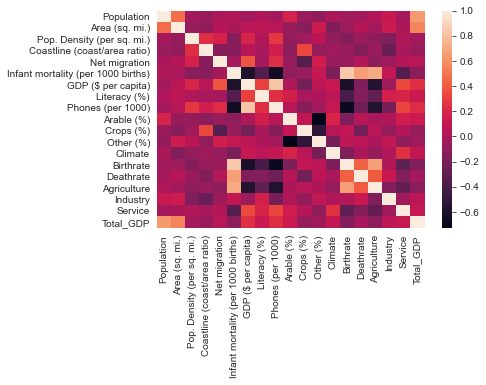

In [91]:
# Plot the correlation betwen all data columns in the heatmap

import seaborn as sns
sns.heatmap(df_world.corr())

We notice that the diagonal entries are all 1, because each column is maximally
correlated with itself.

Lighter coloured boxes mean that the values in the columns tend to move together
(i.e. there is a strong linear relationship between column A and column B). 
However, the correlation between data columns in this data set seems to be very weak (darker colour squares, which are relatively far from 1.

The strongest correlation seems to be between GDP and Phones, Birthrate, Infant Mortality and Literacy.


#### Constructing a histogram for the GDP

In [280]:
# Rename some of the columns
df_world.rename(columns={'GDP ($ per capita)' : 'GDP'}, inplace=True)
df_world.rename(columns={'Phones (per 1000)' : 'Phones'}, inplace=True)
df_world.rename(columns={'Literacy (%)' : 'Literacy'}, inplace=True)
df_world.rename(columns={'Pop. Density (per sq. mi.)' : 'Pop_Density'}, inplace=True)
df_world.rename(columns={'Net migration' : 'Migration'}, inplace=True)
df_world.rename(columns={'Infant mortality (per 1000 births)' : 'Infant_mortality'}, inplace=True)



In [93]:
# Break the range of values into intervals and count how many observations fall into each interval.

# Spit the GDP data into tranches

cut_points = [1,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000]
labels_name = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000','35000-40000','40000-45000','45000-50000','50000-55000','55000-60000']
df_world['GDP_category'] = pd.cut(df_world['GDP'], bins=cut_points,labels=labels_name)
df_world

Country                               Region  Population  \
169         Russia                  C.W. OF IND. STATES    142893540   
36          Canada   NORTHERN AMERICA                       33098932   
214  United States   NORTHERN AMERICA                      298444215   
42           China         ASIA (EX. NEAR EAST)           1313973713   
27          Brazil               LATIN AMER. & CARIB       188078227   
..              ...                                  ...         ...   
122          Macau         ASIA (EX. NEAR EAST)               453125   
209         Tuvalu   OCEANIA                                   11810   
144          Nauru   OCEANIA                                   13287   
78       Gibraltar   WESTERN EUROPE                            27928   
138         Monaco   WESTERN EUROPE                            32543   

     Area (sq. mi.)  Pop_Density  Coastline (coast/area ratio)  Migration  \
169        17075200          8.4                          0.22       1.02   
36          9984670          3.3                          2.02       5.96   
214         9631420         31.0                          0.21       3.41   
42          9596960        136.9                          0.15      -0.40   
27          8511965         22.1                          0.09      -0.03   
..              ...          ...                           ...        ...   
122              28      16183.0                        146.43       4.86   
209              26        454.2                         92.31       0.00   
144              21        632.7                        142.86       0.00   
78                7       3989.7                        171.43       0.00   
138               2      16271.5                        205.00       7.75   

     Infant_mortality      GDP  Literacy  ...  Crops (%)  Other (%)  Climate  \
169             15.39   8900.0      99.6  ...       0.11      92.56      0.0   
36               4.75  29800.0      97.0  ...       0.02      95.02      0.0   
214              6.50  37800.0      97.0  ...       0.22      80.65      3.0   
42              24.18   5000.0      90.9  ...       1.25      83.35      1.5   
27              29.61   7600.0      86.4  ...       0.90      92.15      2.0   
..                ...      ...       ...  ...        ...        ...      ...   
122              4.39  19400.0      94.5  ...       0.00     100.00      2.0   
209             20.03   1100.0       0.0  ...       0.00     100.00      2.0   
144              9.95   5000.0       0.0  ...       0.00     100.00      2.0   
78               5.13  17500.0       0.0  ...       0.00     100.00      0.0   
138              5.43  27000.0      99.0  ...       0.00     100.00      0.0   

     Birthrate  Deathrate  Agriculture  Industry  Service     Total_GDP  \
169       9.95      14.65        0.054     0.371    0.575  1.271753e+12   
36       10.78       7.80        0.022     0.294    0.684  9.863482e+11   
214      14.14       8.26        0.010     0.204    0.787  1.128119e+13   
42       13.25       6.97        0.125     0.473    0.403  6.569869e+12   
27       16.56       6.17        0.084     0.400    0.516  1.429395e+12   
..         ...        ...          ...       ...      ...           ...   
122       8.48       4.47        0.001     0.072    0.927  8.790625e+09   
209      22.18       7.11        0.166     0.272    0.562  1.299100e+07   
144      24.76       6.70        0.000     0.000    0.000  6.643500e+07   
78       10.74       9.31        0.000     0.000    0.000  4.887400e+08   
138       9.19      12.91        0.170     0.000    0.000  8.786610e+08   

     GDP_category  
169    5000-10000  
36    25000-30000  
214   35000-40000  
42         0-5000  
27     5000-10000  
..            ...  
122   15000-20000  
209        0-5000  
144        0-5000  
78    15000-20000  
138   25000-30000  

[227 rows x 22 columns]

In [94]:
# Count the frequencies of each intervals per tranche
df_world['GDP_category'].value_counts().sort_index().to_frame()


GDP_category
0-5000                108
5000-10000             42
10000-15000            18
15000-20000            22
20000-25000            11
25000-30000            16
30000-35000             5
35000-40000             3
40000-45000             0
45000-50000             0
50000-55000             0
55000-60000             1

In [95]:
# calculate the relative frequency
df_world['GDP_category'].value_counts(normalize=True).sort_index().to_frame()*100

GDP_category
0-5000          47.787611
5000-10000      18.584071
10000-15000      7.964602
15000-20000      9.734513
20000-25000      4.867257
25000-30000      7.079646
30000-35000      2.212389
35000-40000      1.327434
40000-45000      0.000000
45000-50000      0.000000
50000-55000      0.000000
55000-60000      0.442478

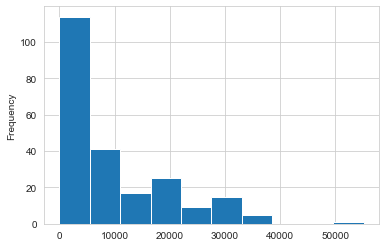

In [96]:
# Plot the histogram
df_world['GDP'].plot.hist();

In [ ]:
# We can observe that there are some values in the outlying region, most countries have GDP below $5000.
# Shape: the histogram is skewed right
# Centre: there is no centre as such, data is concentrated on the right
# Spread: from 0 to 55,000

In [97]:
# compute cumulative frequency
df_world_cf = df_world['GDP_category'].value_counts(normalize=True).sort_index().to_frame()*100
df_world_cf

GDP_category
0-5000          47.787611
5000-10000      18.584071
10000-15000      7.964602
15000-20000      9.734513
20000-25000      4.867257
25000-30000      7.079646
30000-35000      2.212389
35000-40000      1.327434
40000-45000      0.000000
45000-50000      0.000000
50000-55000      0.000000
55000-60000      0.442478

In [98]:
df_world_cf['cumulative_frequency'] = df_world_cf['GDP_category'].cumsum()
df_world_cf

GDP_category  cumulative_frequency
0-5000          47.787611             47.787611
5000-10000      18.584071             66.371681
10000-15000      7.964602             74.336283
15000-20000      9.734513             84.070796
20000-25000      4.867257             88.938053
25000-30000      7.079646             96.017699
30000-35000      2.212389             98.230088
35000-40000      1.327434             99.557522
40000-45000      0.000000             99.557522
45000-50000      0.000000             99.557522
50000-55000      0.000000             99.557522
55000-60000      0.442478            100.000000

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '50000-55000'),
  Text(0.0, 0, '0-5000'),
  Text(2.0, 0, '10000-15000'),
  Text(4.0, 0, '20000-25000'),
  Text(6.0, 0, '30000-35000'),
  Text(8.0, 0, '40000-45000'),
  Text(10.0, 0, '50000-55000'),
  Text(12.0, 0, '')])

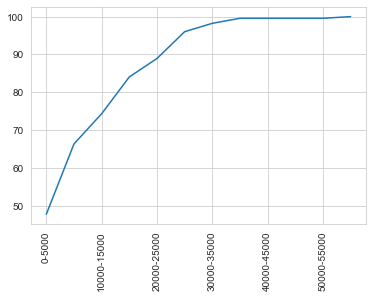

In [99]:
# Plot the cumulative frequency
df_world_cf['cumulative_frequency'].plot()
plt.xticks(rotation=90)

In [ ]:
# We can see that over 96% of countries had GDP below $30,000. We have some outliers
# with the GDP above $50,000

In [100]:
# Calculate the Mode
# (Mode is dentified the mode as the value where the distribution has a “peak”, 
# the value that occurs with the highest frequency.)

df_world['GDP'].mode()[0]

800.0

In [101]:
# Calculate the Mean
# (The mean is the average of a set of observations)

df_world['GDP'].mean()

9647.136563876653

In [102]:
# Calculate the Median
# (The median is the midpoint of the distribution. It is the number such that half of the 
# observations fall above, and half fall below.)

df_world['GDP'].median()

5500.0

In [ ]:
# For skewed right distributions and/or datasets with high outliers:
# Mean is greater than the Median, which is the case here.

In [ ]:
# Calculate the Spread:

In [103]:
# Calculate the Range
# Range = Max - Min

min_GDP = df_world['GDP'].min()
max_GDP = df_world['GDP'].max()
GDP_range = max_GDP - min_GDP
GDP_range

55100.0

In [104]:
# Calculate IQR

# this gives the Q1
Q1 = df_world['GDP'].quantile(.25)
Q1

1900.0

In [105]:
# this gives the Q3
Q3 = df_world['GDP'].quantile(.75)
Q3

15700.0

In [106]:
IQR = Q3 - Q1
IQR

13800.0

In [107]:
# Calculate the range for Outliers
# Anything below the lower number or above the higher number is considered a suspected outlier.
print(Q1 - 1.5*IQR)
print(Q3 + 1.5*IQR)

-18800.0
36400.0


# We can conclude that GDP above 36,400 would be considered as an outlier. However, it
# would not be a good idea to remove them beacuse it's very feasible that the are some very rich
# countries that have GDP well above the majority of the rest of the countries in the world.
# We can see on the box plot of GDP in the notes above that the biggest outlier is in Northern Europe, one of the most developed regions in the world.
# In this case the outliers should not be removed as it looks like a genuine data.

In [108]:
# Calculate the Standard Deviation
df_world.std()


Population                      1.178913e+08
Area (sq. mi.)                  1.790282e+06
Pop_Density                     1.660186e+03
Coastline (coast/area ratio)    7.228686e+01
Migration                       4.856712e+00
Infant_mortality                3.538833e+01
GDP                             1.004749e+04
Literacy                        2.934607e+01
Phones                          2.280990e+02
Arable (%)                      1.304672e+01
Crops (%)                       8.335358e+00
Other (%)                       1.779556e+01
Climate                         9.185686e-01
Birthrate                       1.138714e+01
Deathrate                       5.093580e+00
Agriculture                     1.467303e-01
Industry                        1.517407e-01
Service                         2.132723e-01
Total_GDP                       9.546004e+11
dtype: float64

> Like the mean, the Standard Deviation is strongly influenced by outliers in the data
> The mean and the standard deviation as measures of center and spread 
> can be only used for reasonably symmetric distributions with no outliers.

> In this case we can use the five-number summary (which gives the median, IQR and range).
> However, IQR seems to be way too high as well. The median seems like the best fit.


### Machine Learning Algorithms

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import model_selection, metrics
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 10.0)
plt.rcParams['figure.figsize'] = (8.0, 6.0)

### Splitting Data into Training and Testing Datasets

In [134]:
# Independent Axis
X=df_world['Phones']

# Dependent Axis
y=df_world['GDP']

In [135]:
X = X.values.reshape(-1, 1)
X.shape

(227, 1)

In [139]:
from sklearn import model_selection, metrics
kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=24)

In [140]:
set1, set2, set3 = kf.split(df_world)

In [141]:
df_world.iloc[set1[0],:]

Country                               Region  Population  \
36          Canada   NORTHERN AMERICA                       33098932   
214  United States   NORTHERN AMERICA                      298444215   
42           China         ASIA (EX. NEAR EAST)           1313973713   
27          Brazil               LATIN AMER. & CARIB       188078227   
94           India         ASIA (EX. NEAR EAST)           1095351995   
..              ...                                  ...         ...   
140     Montserrat               LATIN AMER. & CARIB            9439   
177     San Marino   WESTERN EUROPE                            29251   
122          Macau         ASIA (EX. NEAR EAST)               453125   
144          Nauru   OCEANIA                                   13287   
138         Monaco   WESTERN EUROPE                            32543   

     Area (sq. mi.)  Pop_Density  Coastline (coast/area ratio)  Migration  \
36          9984670          3.3                          2.02       5.96   
214         9631420         31.0                          0.21       3.41   
42          9596960        136.9                          0.15      -0.40   
27          8511965         22.1                          0.09      -0.03   
94          3287590        333.2                          0.21      -0.07   
..              ...          ...                           ...        ...   
140             102         92.5                         39.22       0.00   
177              61        479.5                          0.00      10.98   
122              28      16183.0                        146.43       4.86   
144              21        632.7                        142.86       0.00   
138               2      16271.5                        205.00       7.75   

     Infant_mortality      GDP  Literacy  ...  Crops (%)  Other (%)  Climate  \
36               4.75  29800.0      97.0  ...       0.02      95.02      0.0   
214              6.50  37800.0      97.0  ...       0.22      80.65      3.0   
42              24.18   5000.0      90.9  ...       1.25      83.35      1.5   
27              29.61   7600.0      86.4  ...       0.90      92.15      2.0   
94              56.29   2900.0      59.5  ...       2.74      42.86      2.5   
..                ...      ...       ...  ...        ...        ...      ...   
140              7.35   3400.0      97.0  ...       0.00      80.00      2.0   
177              5.73  34600.0      96.0  ...       0.00      83.33      0.0   
122              4.39  19400.0      94.5  ...       0.00     100.00      2.0   
144              9.95   5000.0       0.0  ...       0.00     100.00      2.0   
138              5.43  27000.0      99.0  ...       0.00     100.00      0.0   

     Birthrate  Deathrate  Agriculture  Industry  Service     Total_GDP  \
36       10.78       7.80        0.022     0.294    0.684  9.863482e+11   
214      14.14       8.26        0.010     0.204    0.787  1.128119e+13   
42       13.25       6.97        0.125     0.473    0.403  6.569869e+12   
27       16.56       6.17        0.084     0.400    0.516  1.429395e+12   
94       22.01       8.18        0.186     0.276    0.538  3.176521e+12   
..         ...        ...          ...       ...      ...           ...   
140      17.59       7.10        0.000     0.000    0.000  3.209260e+07   
177      10.02       8.17        0.000     0.000    0.000  1.012085e+09   
122       8.48       4.47        0.001     0.072    0.927  8.790625e+09   
144      24.76       6.70        0.000     0.000    0.000  6.643500e+07   
138       9.19      12.91        0.170     0.000    0.000  8.786610e+08   

     GDP_category  
36    25000-30000  
214   35000-40000  
42         0-5000  
27     5000-10000  
94         0-5000  
..            ...  
140        0-5000  
177   30000-35000  
122   15000-20000  
144        0-5000  
138   25000-30000  

[151 rows x 22 columns]

In [240]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df_world, test_size=0.2, random_state=25)


In [241]:
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")


No. of training examples: 181
No. of testing examples: 46


### Linear Regression

In [283]:
# We use linear regression when there is a strong linear relation in our data, and there are two methods that can help
# us determine this. The first is visual inspection and the otherPearson correlation coefficient.

# We can use the Pearson correlation coefficient, which is a measure of how strongly two data
# sets are linearly related. The closer to 1 or -1 the correlation is, the stronger the linear 
# relationship in the data is. We compute the correlation forthe data:

# Independent Axis
X=df_world['Phones']

# Dependent Axis
y=df_world['GDP']

np.corrcoef(X,y)    
    

array([[1.        , 0.82815083],
       [0.82815083, 1.        ]])

> The correlation in this case is fairly close to 1, adding to our conclusion from our visual inspection 
that the data is linearly related.

In [110]:
X.head()

169    280.6
36     552.2
214    898.0
42     266.7
27     225.3
Name: Phones, dtype: float64

In [111]:
y.head()

169     8900.0
36     29800.0
214    37800.0
42      5000.0
27      7600.0
Name: GDP, dtype: float64

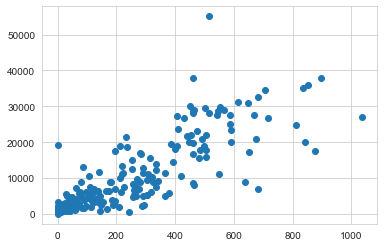

In [112]:
plt.scatter(X, y)

In [113]:
X.shape

(227,)

In [114]:
y.shape

(227,)

In [115]:
X.values

array([2.8060e+02, 5.5220e+02, 8.9800e+02, 2.6670e+02, 2.2530e+02,
       5.6550e+02, 4.5400e+01, 2.2040e+02, 1.6410e+02, 1.6300e+01,
       7.8100e+01, 2.0000e-01, 4.4890e+02, 1.8160e+02, 1.4060e+02,
       5.2000e+01, 1.2710e+02, 2.7640e+02, 5.5100e+01, 7.9500e+01,
       1.3000e+00, 1.9000e+00, 7.8000e+00, 6.4000e+00, 1.0700e+02,
       1.7620e+02, 8.2000e+00, 7.1900e+01, 1.2900e+01, 1.3180e+02,
       4.0000e+00, 9.3000e+00, 1.4010e+02, 6.2600e+01, 3.1800e+01,
       3.5000e+00, 2.6950e+02, 2.1300e+02, 8.2000e+00, 1.0100e+01,
       3.2000e+00, 1.1300e+01, 2.3000e+00, 2.5990e+02, 8.0500e+01,
       3.6000e+00, 8.1000e+00, 5.8640e+02, 3.7200e+01, 1.0890e+02,
       4.5350e+02, 7.4600e+01, 5.7000e+00, 1.0900e+01, 7.1500e+02,
       6.2900e+01, 4.0400e+01, 3.8600e+01, 4.9200e+01, 2.6800e+01,
       4.6120e+02, 6.6790e+02, 3.7000e+00, 4.0530e+02, 1.7900e+02,
       1.8770e+02, 4.6170e+02, 1.4600e+01, 3.0630e+02, 4.3090e+02,
       3.8400e+01, 1.2560e+02, 7.0000e+00, 4.4170e+02, 2.7400e

In [117]:
X = X.values.reshape(-1, 1)
X.shape

(227, 1)

In [ ]:
X

In [119]:
#. Create the model

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [120]:
model

LinearRegression()

In [121]:
model.fit(X, y)

LinearRegression()

In [122]:
model.score(X, y)

0.6858338011320353

< R2 score of 0.686

In [123]:
# b1
model.coef_

array([36.47903869])

In [124]:
# b0
model.intercept_

1187.5832115123594

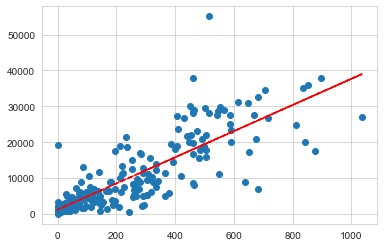

In [125]:
plt.scatter(X, y)
# y_hat = bo + b1 * X
output = model.coef_ * X + model.intercept_
plt.plot(X, output, 'r--')

### Predictions

In [126]:
predictions = model.predict(X)

In [127]:
len(predictions)

227

In [128]:
predictions_df = pd.DataFrame(
    {
        'Predicted': predictions ,
        'Actual': y,
        'Error': predictions - y
    }
)
predictions_df.head(15)

Predicted   Actual        Error
169  11423.601468   8900.0  2523.601468
36   21331.308376  29800.0 -8468.691624
214  33945.759955  37800.0 -3854.240045
42   10916.542830   5000.0  5916.542830
27    9406.310628   7600.0  1806.310628
11   21816.479590  29000.0 -7183.520410
94    2843.731568   2900.0   -56.268432
8     9227.563339  11200.0 -1972.436661
106   7173.793460   6300.0   873.793460
192   1782.191542   1900.0  -117.808458
2     4036.596133   6000.0 -1963.403867
45    1194.879019    700.0   494.879019
80   17563.023679  20000.0 -2436.976321
135   7812.176638   9000.0 -1187.823362
179   6316.536051  11800.0 -5483.463949

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"r2 is :{r2}")

MSE is :31575980.53722599
MAE is :3607.1709495256655
r2 is :0.6858338011320353


# Error Matrix:
    MSE- Mean Square Error
    MAE - Mean Average Error
    R2 - best fit - on the measure form 0 to 1.

> R2 of 0.686 is closer to 1 than 0 but not the best fit.

### Linear Regression with statsmodels

In [132]:
# Import the formula tools
import statsmodels.formula.api as smf

# Create the linear regression model object ("ols" stands for ordinary least squares)
model = smf.ols(data = df_world, formula = "y ~ X")

# Create a RegressionResults object
result = model.fit()

In [133]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     491.2
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           1.73e-58
Time:                        17:48:42   Log-Likelihood:                -2282.0
No. Observations:                 227   AIC:                             4568.
Df Residuals:                     225   BIC:                             4575.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1187.5832    534.823      2.221      0.027     133.681    2241.486
X             36.4790      1.646     22.163      0.000      33.236      39.723
==============================================================================
Omnibus:                       79.013   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.768
Skew:                           1.141   Prob(JB):                    6.95e-125
Kurtosis:                      10.432   Cond. No.                         464.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Try to calcualte it again with more features

In [265]:
#Train and Test data split
train, test = train_test_split(df_world, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [266]:
print(train_X.shape) 
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(158, 13)
(158,)
(69, 13)
(69,)


### Linear Regression Model

In [267]:
model1 = LinearRegression()
model1.fit(train_X, train_Y)
train_pred_Y = model1.predict(train_X)
test_pred_Y = model1.predict(test_X)

In [269]:
from sklearn.metrics import r2_score

In [270]:
print('Training Score : ',model1.score(train_X,train_Y))
print(f'Test score : ',r2_score(test_pred_Y,test_Y))

Training Score :  0.7511806166923699
Test score :  0.6934377807573464


> R2 score of 0.683

<AxesSubplot:xlabel='GDP ($ per capita)'>

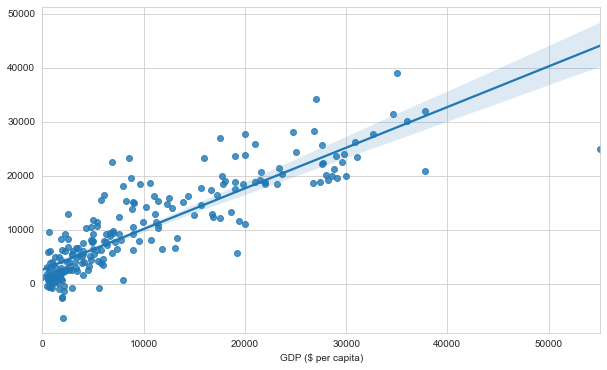

In [275]:
plt.figure(figsize=(10,6))
whole=model1.predict(df_world[training_features])
sns.regplot(x=df_world[target],y=whole) 

In [ ]:
# Pandas-Profiling 3.0.0
df_world.profile_report()